In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# need this cell to import the help functions:

import os
path_sections = os.getcwd().split('\\')
if path_sections[-1] != 'CGM':
    os.chdir('./..')

In [53]:
# import help functions:

from data_processing.cgm_data import CGMData
from data_processing.cgm_data_helper import plot_series_with_food
from data_processing.derived_datasets import max_glucose_dataset,max_glucose_between_meals_dataset

from sklearn.linear_model import LinearRegression,LogisticRegression

In [54]:
data = CGMData()

In [55]:
# Finding 5/95th percentile idea from Dan Visscher

high_glu = []
low_glu = []

# Find 5th/95th percentile for glucose range for each patient
for i in range(1,3):
    low_glu.append(np.percentile(data[i].glu, 5))
    high_glu.append(np.percentile(data[i].glu, 95))




In [60]:
print(high_glu)
print(low_glu)

[137.0, 167.0]
[85.0, 99.0]


In [64]:
high_glu[participant_number-1]

137.0

In [65]:
# Select participant number
participant_number = 1
high_glu_par = high_glu[participant_number-1]

# Max glucose between meals:
df = max_glucose_dataset(cgm_data=data,participant_num=participant_number,glu_thresh=high_glu_par)



In [66]:
X = df[['total_carb','sugar','protein']]
y = df[['high_glucose']]
y

,high_glucose
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


In [67]:
log_reg = LogisticRegression(penalty=None)
X = df[['total_carb']]
y = df['high_glucose']

## fit the model
log_reg.fit(X,y)

LogisticRegression(penalty=None)

In [68]:
log_reg.coef_[0][0]

0.002796662555091423

c:\Users\maggi\.conda\envs\erdos_may_2024\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


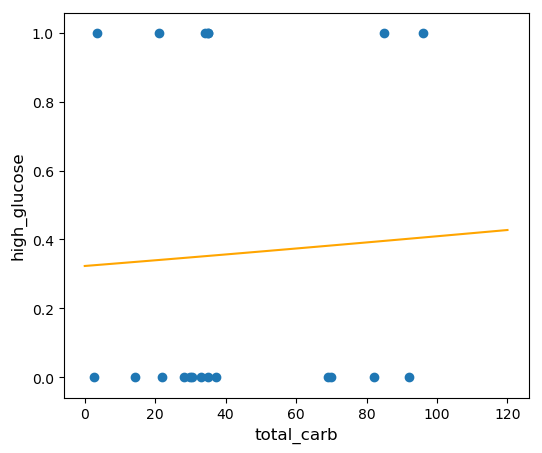

In [70]:
plt.figure(figsize=(6,5))

plt.scatter(X, y)

plt.plot(np.linspace(0,120), log_reg.predict_proba(np.linspace(0,160).reshape(-1,1))[:,1], color = 'orange')
#plt.plot(np.linspace(7,13), my_log_reg.predict_proba(np.linspace(7,13).reshape(-1,1)), c = 'k')

plt.xlabel("total_carb", fontsize=12)
plt.ylabel("high_glucose", fontsize=12)
plt.show()

next steps: 
1. put in data from all but the hold out participants
2. use first predictor project code to get baseline model predictions